In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
csv = pd.read_csv("bmi.csv")

# 몸무게와 키 데이터
csv["weight"] /= 100   #normalization
csv["height"] /= 200   #normalization
X = csv[["weight", "height"]].as_matrix()

# 레이블
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))     # 2000x3 크기의 다차원 벡터 생성
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]        #"thin'이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기 --- (※2)
X_train, y_train = X[1:15001], y[1:15001]
X_test,  y_test  = X[15001:20001], y[15001:20001]

print(X_train)

[[0.73  0.71 ]
 [0.61  0.885]
 [0.48  0.935]
 ...
 [0.8   0.865]
 [0.38  0.955]
 [0.55  0.69 ]]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [2]:
# 모델 구조 정의하기
model = tf.keras.Sequential()  #순차적 계층화 준비
model.add(layers.Dense(8, input_shape=(2,)))  #입력 2개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  #ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        #dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))         #4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) #분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss="categorical_crossentropy",  #다중 교차엔트로피
    optimizer="rmsprop",   #최적화 기법 중 하나
    metrics=['accuracy'])  #정확도 측정

In [3]:
# 데이터 훈련하기 --- (※5)
hist = model.fit(
    X_train, y_train,
    batch_size=100,  #100개에 한 번씩 업데이터 실행
    epochs=50,       #훈련 데이터셋을 총 50회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,  
      #validation data 분할 비율. 즉, 15000개 중에서 20%인 3000개를 validation용으로 분할 (데이터에 잘학습되었는지 확인)
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)  #전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기 --- (※6)
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Train on 12000 samples, validate on 3000 samples
Epoch 1/50
12000/12000 [==============================] - 1s 107us/sample - loss: 1.0214 - accuracy: 0.5071 - val_loss: 0.9431 - val_accuracy: 0.6767
Epoch 2/50
12000/12000 [==============================] - 0s 20us/sample - loss: 0.9316 - accuracy: 0.5862 - val_loss: 0.8693 - val_accuracy: 0.6760
Epoch 3/50
12000/12000 [==============================] - 0s 20us/sample - loss: 0.8629 - accuracy: 0.6003 - val_loss: 0.7989 - val_accuracy: 0.6737
Epoch 4/50
12000/12000 [==============================] - 0s 19us/sample - loss: 0.7982 - accuracy: 0.6215 - val_loss: 0.7276 - val_accuracy: 0.7160
Epoch 5/50
12000/12000 [==============================] - 0s 19us/sample - loss: 0.7366 - accuracy: 0.6479 - val_loss: 0.6518 - val_accuracy: 0.7670
Epoch 6/50
12000/12000 [==============================] - 0s 19us/sample - loss: 0.6740 - accuracy: 0.6916 - val_loss: 0.5857 - val_accuracy: 0.8170
Epoch 7/50
12000/12000 [==============================] 

test_loss:  0.0811320616587755
test_acc:  0.979996


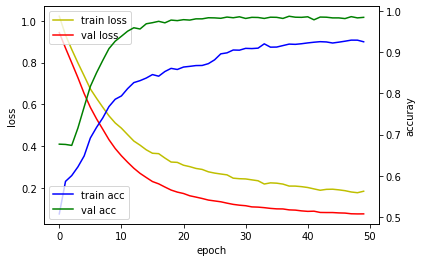

In [5]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


acc_ax = loss_ax.twinx()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
